[*********************100%***********************]  1 of 1 completed


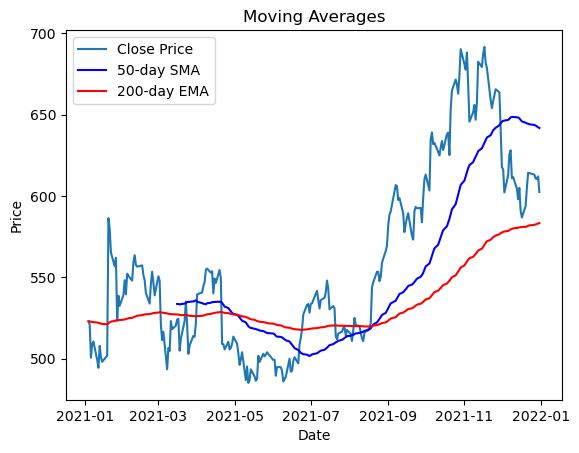

In [17]:

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_data(stock, start_date, end_date):
    dat = yf.download(stock, start=start_date, end=end_date)
    return dat

def SMA(data, n): 
    sma = []
    for i in range(len(data) - n+1):
        total = sum(data[i:i + n])
        smai = total / n
        sma.append(smai)
    return sma

def EMA(data, n): 
    ema = []
    alpha = 2 / (n + 1)
    emai = float(data.iloc[0])
    
    for value in data:
        emai = alpha * value + (1 - alpha) * emai
        ema.append(emai)
        
    return ema

dat = fetch_data("NFLX", "2021-01-01", "2022-01-01")
dat['Close'] = pd.to_numeric(dat['Close'])
close = dat['Close']

sma = SMA(close, 50)
ema = EMA(close, 200)

dat['SMA']=[None] * (49) + sma
dat['EMA']= ema

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')

plt.plot(dat['Close'], label='Close Price')
plt.plot(dat['SMA'], 'b', label='50-day SMA')
plt.plot(dat['EMA'], 'r', label='200-day EMA')

plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


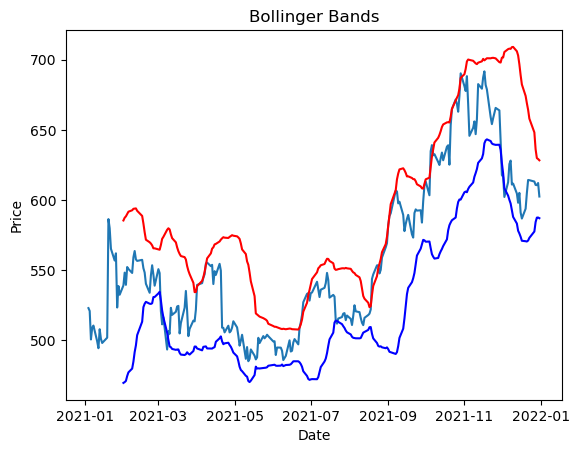

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def data(stock, start_date, end_date):
    dat= yf.download(stock, start_date, end_date)
    return dat

def BogBands(data, n):
    MA= data["Close"].rolling(n).mean()
    SD= data["Close"].rolling(n).std()
    data["Upper_band"]= MA+2*SD
    data["Lower_band"]= MA-2*SD
    return data

dat= data("NFLX", "2021-01-01", "2022-01-01")
BogBands(dat,20)
close= dat["Close"]

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')

plt.plot(close,label='Close Price')
plt.plot(dat['Upper_band'],'r', label='Upper band')
plt.plot(dat['Lower_band'],'b', label='Lower band')

plt.show()

[*********************100%***********************]  1 of 1 completed


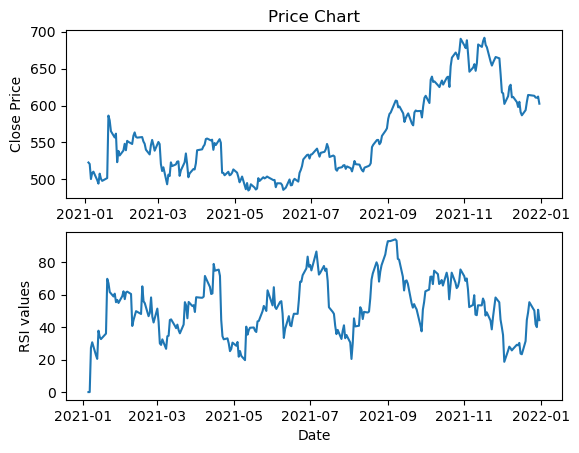

In [19]:

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def dat(stock, start_date, end_date):
    dat= yf.download(stock, start_date, end_date)
    return dat

def RSI(data):
    close_delta = data['Close'].diff()
    up = close_delta.where(close_delta > 0, 0)
    down = -close_delta.where(close_delta < 0, 0)

    average_gain = up.rolling(window=14, min_periods=1).mean()
    average_loss = down.rolling(window=14, min_periods=1).mean()

    rs = average_gain / average_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data= dat("NFLX", "2021-01-01", "2022-01-01")
data['RSI']= RSI(data)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_ylabel('Close Price')
ax1.set_title('Price Chart')
ax1.plot(data['Close'], label='Close price')

ax2.set_xlabel('Date')
ax2.set_ylabel('RSI values')
ax2.plot(data['RSI'], label='RSI')

plt.show()